In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Тест на ассоциацию категориальных переменных $X^2$

$$
X^2=\sum_{i=1}^c\sum_{j=1}^r\frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim\chi^2_{(r-1)(c-1)}
$$

Если нулевая гипотеза о независимости переменных верна, то статистика распределена как хи-квадрат распределение с $(r-1)(c-1)$ степенями свободы.

## Тестирование на принадлежностьраспределению хи-квадрат

хи-квадрат то распределение суммы квадратов независимых стандартных нормальных случайных величин
$$
Q=\sum_{i=1}^dZ_i^2, \quad Z_i\sim \mathcal{N}(0, 1)
$$
величина $Q$ распределена по закону:
$$
Q \sim \chi_d^2
$$

## График плотности распределения хи-квадрат для различных $d$

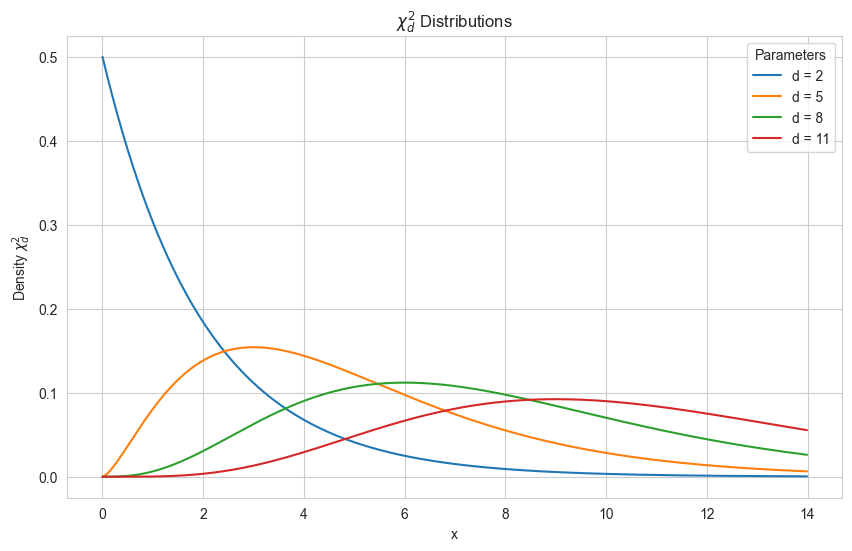

In [2]:
start_df = 2
end_df = 12
step = 3
x = np.arange(0, int(end_df * 1.2), 0.01)

plt.figure(figsize=(10, 6))

for i in range(start_df, end_df, step):
    plt.plot(x, sp.stats.chi2.pdf(x, df=i), label=f'd = {i}')
plt.legend(title='Parameters')

plt.ylabel('Density $\chi^2_d$')
plt.xlabel('x')
plt.title('$\chi^2_d$ Distributions')
# plt.savefig("chi_square_density.pdf")
plt.show()

## График кумулятивной функции распределения

$$
F(x)=\int_0^zp(y)dy
$$

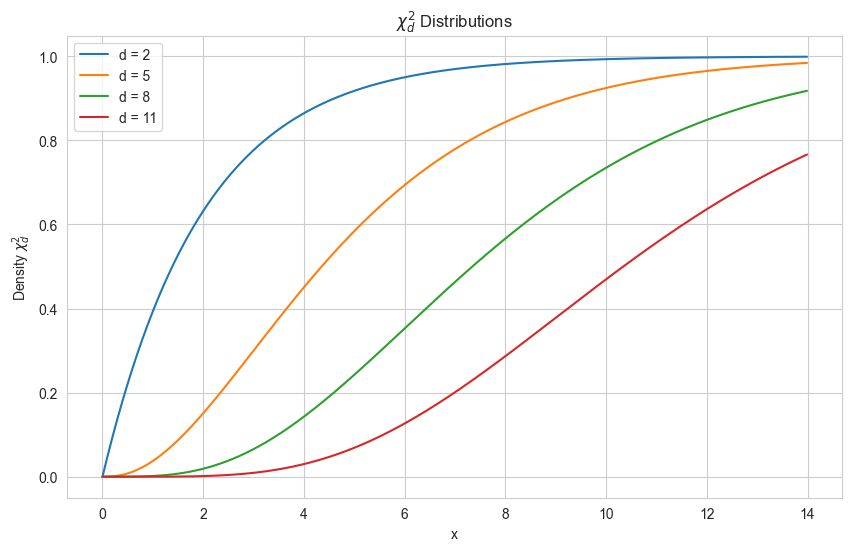

In [3]:
xs = np.arange(0, int(end_df * 1.2), 0.01)
plt.figure(figsize=(10, 6))
for d in range(2, 12, 3):
    pdf = sp.stats.chi2(df=d).cdf
    plt.plot(xs, pdf(xs), label=f'd = {d}')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.ylabel('Density $\chi^2_d$')
plt.xlabel('x')
plt.title('$\chi^2_d$ Distributions')

plt.show()

## Вычислим нашу лекционную задачу про связь между возрастом и видом часов.

Есть ли связь между видом часов и возрастом людей.

In [4]:
# наблюдаемые значения
O = np.array([[10, 17, 37],[31, 22, 12]])

# Ожидаемые (частотные вероятности) в предположении независимости переменных
E = np.array([[20.34, 19.35, 24.31],[20.66, 19.65, 24.69]])

In [5]:
(O-E)**2/E

array([[5.25642085, 0.28540052, 6.62427396],
       [5.17500484, 0.28104326, 6.52232078]])

In [6]:
# Значение статистики хи-квадрат
chi_square = ((O-E)**2/E).sum()
chi_square

np.float64(24.14446419866432)

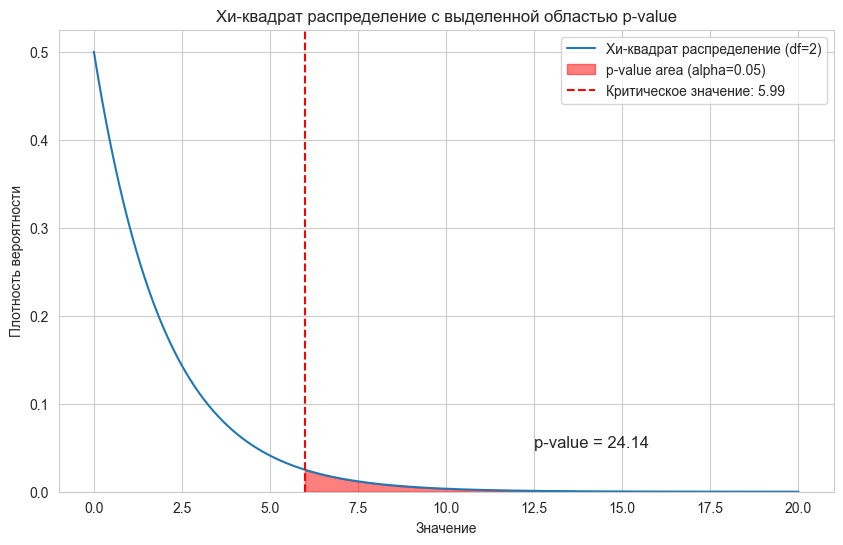

In [7]:
# Параметры хи-квадрат распределения
df = 2  # Количество степеней свободы
alpha = 0.05  # Уровень значимости

# Генерация значений для оси X
x = np.linspace(0, 20, 1000)

# Вычисление плотности вероятности для хи-квадрат распределения
y = sp.stats.chi2.pdf(x, df)

# Критическое значение хи-квадрат при заданном уровне значимости
chi2_critical = sp.stats.chi2.ppf(1 - alpha, df)

# Построение графика хи-квадрат распределения
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Хи-квадрат распределение (df={df})')

# Закраска области p-value
x_fill = np.linspace(chi2_critical, 20, 1000)
y_fill = sp.stats.chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'p-value area (alpha={alpha})')

# Настройки графика
plt.title('Хи-квадрат распределение с выделенной областью p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Критическое значение: {chi2_critical:.2f}')
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.text(12.5, 0.05, f'p-value = {np.round(chi_square, 2)}', fontsize=12)
# plt.savefig('chi-square.png')
plt.show()

## Проверка является ли переменная каким-то распределением.

Рассмотрим кубик - выпадение граней должно подчинятся равномерному распределению

$$
H_0:x\sim U[1, \cdots, 6]
$$

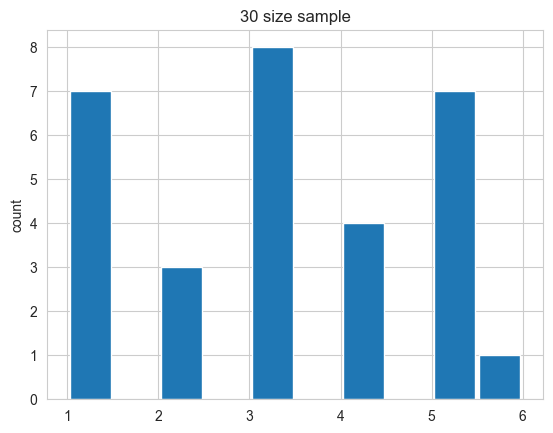

In [8]:
n = 30

X = np.random.choice(range(1, 7), size=n)

plt.hist(X, rwidth=0.9)
plt.title(f'{n} size sample')
plt.ylabel('count')
plt.show()

In [9]:
# Observation
die_bins = [(x-.5) for x in range(1, 8)]
O = np.histogram(X, bins=die_bins)[0]
O

array([7, 3, 8, 4, 7, 1])

In [10]:
# Expected

E = np.ones(6) * n / 6
E

array([5., 5., 5., 5., 5., 5.])

Вычислим статистику:
$$
X^2=\sum_{i=1}^c\frac{(O_{i}-E_{i})^2}{E_{i}}\sim\chi^2_{(c-1)}
$$

In [11]:
# Chi value
chi_value = ((O-E)**2 / E).sum()
chi_value

np.float64(7.6000000000000005)

In [12]:
df = 5  # Количество степеней свободы
alpha = 0.05  # Уровень значимости

# Критическое значение хи-квадрат при заданном уровне значимости
chi2_critical = sp.stats.chi2.ppf(1 - alpha, df)
chi2_critical


np.float64(11.070497693516351)

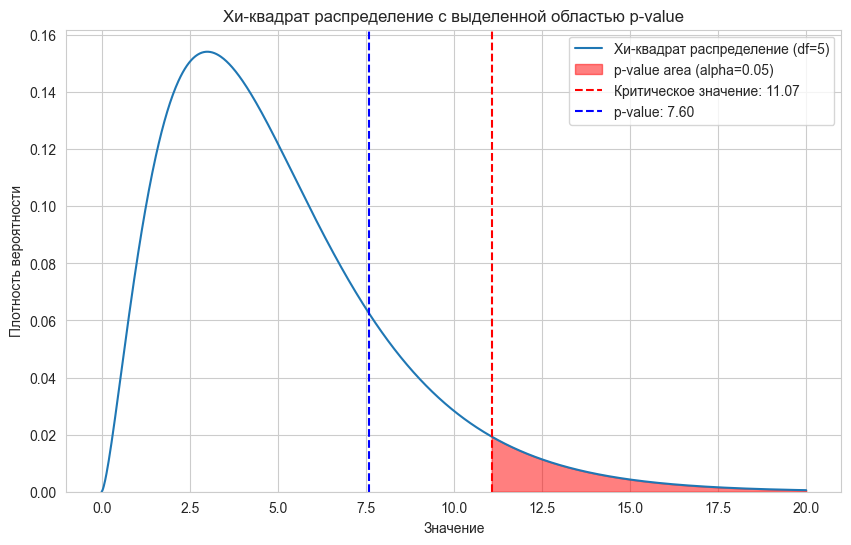

In [13]:
# Параметры хи-квадрат распределения
df = 5  # Количество степеней свободы
alpha = 0.05  # Уровень значимости

# Генерация значений для оси X
x = np.linspace(0, 20, 1000)

# Вычисление плотности вероятности для хи-квадрат распределения
y = sp.stats.chi2.pdf(x, df)

# Критическое значение хи-квадрат при заданном уровне значимости
chi2_critical = sp.stats.chi2.ppf(1 - alpha, df)

# Построение графика хи-квадрат распределения
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Хи-квадрат распределение (df={df})')

# Закраска области p-value
x_fill = np.linspace(chi2_critical, 20, 1000)
y_fill = sp.stats.chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'p-value area (alpha={alpha})')

# Настройки графика
plt.title('Хи-квадрат распределение с выделенной областью p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Критическое значение: {chi2_critical:.2f}')
plt.axvline(chi_value, color='blue', linestyle='--', label=f'p-value: {chi_value:.2f}')
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
# plt.savefig('chi-square.png')
plt.show()